# CLASS 2


## KNN (K-Nearest Neighbors) Classifier

The **Nearest Neighbor (NN) classifier** is a simple, intuitive machine learning algorithm. It works by storing the entire training dataset. When a new (test) example needs to be classified, the algorithm:

1. **Measures the distance** between the test example and every example in the training set using a distance metric (commonly Euclidean distance).
2. **Finds the nearest neighbor** (the training example with the smallest distance to the test example).
3. **Assigns the class label** of the nearest neighbor to the test example.

### Euclidean Distance

- **Definition:** The Euclidean distance between two vectors $y$ (test vector) and $z$ (training example) is calculated as:
    $$
    \text{distance}(y, z) = \| y - z \|_2 = \sqrt{\sum_{i=1}^n (y_i - z_i)^2}
    $$
- **Interpretation:** This measures the straight-line distance between two points in n-dimensional space.


### Hamming Distance

- **Definition:** Measures the number of positions at which two strings of equal length differ.
- **Formula:** For two binary strings $a$ and $b$ of length $n$:
    $$
    \text{Hamming Distance}(a, b) = \sum_{i=1}^n [a_i \neq b_i]
    $$
- **Applications:** Error detection/correction, comparing binary data, DNA sequence analysis.
- **Note:** Inputs can be quantized (e.g., thresholded at 0) to convert numerical data to binary for Hamming distance calculation.

### Manhattan Distance

- **Definition:** The Manhattan distance (also known as L1 distance or "taxicab" distance) between two vectors $y$ and $z$ is calculated as:
    $$
    \text{distance}(y, z) = \| y - z \|_1 = \sum_{i=1}^n |y_i - z_i|
    $$
- **Interpretation:** This measures the distance traveled along axes at right angles (like navigating a city grid).
- **Applications:** Useful when differences along each dimension are equally important or when data is sparse.

### KNN Classifier

- **KNN** generalizes the NN classifier by considering the **K nearest neighbors** (where K is an odd integer, e.g., 3 or 5).
- **Classification:** The class label is determined by a **majority vote** among the K nearest neighbors.
- **K=1:** Equivalent to the NN classifier, but can be sensitive to outliers.
- **K>1:** More robust to noise and outliers, as the decision is based on multiple neighbors.

---    

Predictions: [0 1]


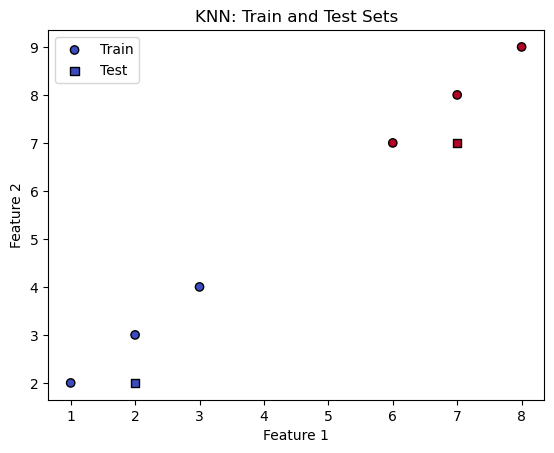

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Example data
# X_train: feature matrix for training data
# y_train: labels for training data
# X_test: feature matrix for test data

X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8], [8, 9]])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_test = np.array([[2, 2], [7, 7]])

knn = KNeighborsClassifier(n_neighbors=3)  # You can change n_neighbors as needed
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Predictions:", y_pred)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train', cmap='coolwarm', edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='s', label='Test', cmap='coolwarm', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('KNN: Train and Test Sets')
plt.show()


## Cross-Validation (K-Folds and Algorithm)

- **Cross-validation** is a technique to assess how well a model generalizes to unseen data (DON'T USE THE TEST DATA!).
- **K-Fold Cross-Validation:**
    - The dataset is split into **K** equal-sized "folds".
    - For each of the K iterations:
        - Use K-1 folds for training.
        - Use the remaining fold for testing.
        - Rotate the test fold each time so every sample is tested once.
    - The model's performance is averaged over all K trials for a robust estimate.

**Algorithm Steps:**
1. Shuffle the dataset randomly.
2. Split the data into K folds.
3. For each fold:
    - Use the fold as the test set.
    - Use the remaining K-1 folds as the training set.
    - Train the model and evaluate on the test fold.
4. After all K iterations, aggregate the performance metrics (e.g., accuracy, precision, recall) from each fold and compute their average. This average provides a more reliable estimate of the model's true performance on unseen data.

- **Common values for K:** 5 or 10.
- **Benefit:** Reduces bias and variance in model evaluation, making results more reliable.


## Cross-Validation: Leave-One-Out Technique

- **Purpose:** To evaluate the performance of a model reliably, especially when the dataset is small.
- **Method:** For a dataset with N samples:
    - Remove one sample (the "test" sample).
    - Train the model on the remaining N-1 samples.
    - Test the model on the removed sample.
    - Repeat this process N times (once for each sample).
- **Advantage:** Maximizes the use of data for training and testing, providing an unbiased estimate of model performance.

---

## Data Augmentation

- **Definition:** Techniques to artificially increase the size and diversity of a dataset by creating modified versions of existing data.
- **Examples:**
    - **Images:** Rotate, flip, crop, or add noise.
    - **Numerical Data:** Add small random noise.
- **Benefit:** Helps prevent overfitting and improves model generalization.

---

#### Figure of Merit Definition

- **Examples:**  
    - **Accuracy:**  
        - **Formula:**  
            $$
            \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
            $$
        - **Use Case:**  
            Useful for balanced classification problems where the number of samples in each class is similar.
    - **Precision:**  
        - **Formula:**  
            $$
            \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
            $$
        - **Use Case:**  
            Important when the cost of false positives is high (e.g., spam detection, where marking a legitimate email as spam is costly).
    - **Recall (Sensitivity):**  
        - **Formula:**  
            $$
            \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
            $$
        - **Use Case:**  
            Important when the cost of false negatives is high (e.g., disease screening, where missing a positive case is critical).
    - **F1-score:**  
        - **Formula:**  
            $$
            \text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
            $$
        - **Use Case:**  
            Useful when you need a single metric that balances precision and recall, especially for imbalanced datasets.
    - **Mean Squared Error (MSE):**  
        - **Formula:**  
            $$
            \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
            $$
            where $y_i$ is the true value and $\hat{y}_i$ is the predicted value.
        - **Use Case:**  
            Commonly used in regression tasks to measure the average squared difference between predicted and actual values. Lower MSE indicates better model performance.
    - **Root Mean Squared Error (RMSE):**  
        - **Formula:**  
            $$
            \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
            $$
        - **Use Case:**  
            Similar to MSE but returns the error in the same units as the target variable, making interpretation more intuitive. Lower RMSE also indicates better model performance.

- **Purpose:** Helps select the best model or configuration for a given problem.

---
### Feature Scaling

- **Definition:** Feature scaling is the process of transforming the input variables of a dataset so that they have a similar scale. This is important because many machine learning algorithms (such as KNN, SVM, and gradient descent-based methods) are sensitive to the scale of the input features.
- **Why Scale Features?**
    - Features with larger ranges can dominate distance calculations and model training.
    - Ensures that each feature contributes equally to the result.
    - Improves convergence speed for optimization algorithms.
- **Common Methods:**
    - **Min-Max Scaling (Normalization):**
        - Scales features to a fixed range, usually [0, 1].
        - Formula:  
            $$
            x' = \frac{x - x_{min}}{x_{max} - x_{min}}
            $$
    - **Standardization (Z-score Normalization):**
        - Centers features around the mean with unit variance.
        - Formula:  
            $$
            x' = \frac{x - \mu}{\sigma}
            $$
            where $\mu$ is the mean and $\sigma$ is the standard deviation.
    - **Robust Scaling:**
        - Uses median and interquartile range, making it robust to outliers.
        - Formula:  
            $$
            x' = \frac{x - \text{median}}{\text{IQR}}
            $$
- **When to Apply:**  
    - Before training models that use distance metrics (e.g., KNN, K-means).
    - Before applying algorithms sensitive to feature scale.
- **Note:**  
    - Always fit the scaler on the training data and apply the same transformation to the test data.  
    - Do not scale target variables unless required for regression tasks.
